**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.neighbors import KDTree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [68]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors=5, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self._fit_method = algorithm

    def fit(self, X, y):
        self.X = X.copy().astype(np.float64)
        if self._fit_method == 'kd_tree':
            self.tree = KDTree(X)
        else:
            self.oper_2 = np.sum(self.X ** 2, axis=1).reshape(1, -1)
        self.y = y.astype(np.uint32)
        self.labels = np.unique(y)
        self.l_num = self.labels.shape[0]

    def _get_arr(self, X):
        if self._fit_method == 'kd_tree':
            _, ind = self.tree.query(X, k=self.n_neighbors)
            return self.y[ind]
        else:
            X1_typed = X.astype(np.float64)
            X2_typed = self.X
            oper_1 = np.sum(X1_typed ** 2, axis=1).reshape(-1, 1)
            prod = np.dot(X1_typed, X2_typed.T)
            dist = np.sqrt(np.maximum(-2 * prod + oper_1 + self.oper_2, 0))
            ind = np.argpartition(dist, self.n_neighbors)
            return self.y[ind[:, :self.n_neighbors]]

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1).astype(self.y.dtype)

    def predict_proba(self, X):
        arr = self._get_arr(X)
        return np.apply_along_axis(lambda x:
                                   np.bincount(x.astype(np.uint8),
                                               minlength=self.l_num),
                                   1, arr) / self.n_neighbors

    def score(self, X, y):
        pred = self.predict(X)
        return sum(pred == y) / len(y)

**IRIS**

In [69]:
iris = datasets.load_iris()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, stratify=iris.target)

In [71]:
clf = KNeighborsClassifier(n_neighbors=5)
my_clf = MyKNeighborsClassifier(n_neighbors=5)

In [72]:
%time clf.fit(X_train, y_train)

CPU times: user 2.33 ms, sys: 0 ns, total: 2.33 ms
Wall time: 1.67 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
%time my_clf.fit(X_train, y_train)

CPU times: user 533 µs, sys: 4 µs, total: 537 µs
Wall time: 406 µs


In [74]:
%time clf.predict(X_test)

CPU times: user 3.27 ms, sys: 24 µs, total: 3.3 ms
Wall time: 2.48 ms


array([0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0,
       2, 1, 1, 2, 0, 2, 0])

In [75]:
%time my_clf.predict(X_test)

CPU times: user 2.92 ms, sys: 22 µs, total: 2.94 ms
Wall time: 2.11 ms


array([0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0,
       2, 1, 1, 2, 0, 2, 0], dtype=uint32)

In [76]:
%time clf.predict_proba(X_test)

CPU times: user 2.77 ms, sys: 21 µs, total: 2.8 ms
Wall time: 2.2 ms


array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.8,  0.2],
       [ 0. ,  0.4,  0.6],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.8,  0.2],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.4,  0.6],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ]])

In [77]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.1 ms, sys: 8 µs, total: 1.11 ms
Wall time: 1.06 ms


array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.8,  0.2],
       [ 0. ,  0.4,  0.6],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.8,  0.2],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.4,  0.6],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ]])

In [78]:
%time clf.score(X_test, y_test)

CPU times: user 3.91 ms, sys: 0 ns, total: 3.91 ms
Wall time: 2.93 ms


1.0

In [79]:
%time my_clf.score(X_test, y_test)

CPU times: user 1.17 ms, sys: 9 µs, total: 1.18 ms
Wall time: 838 µs


1.0

Задание 3

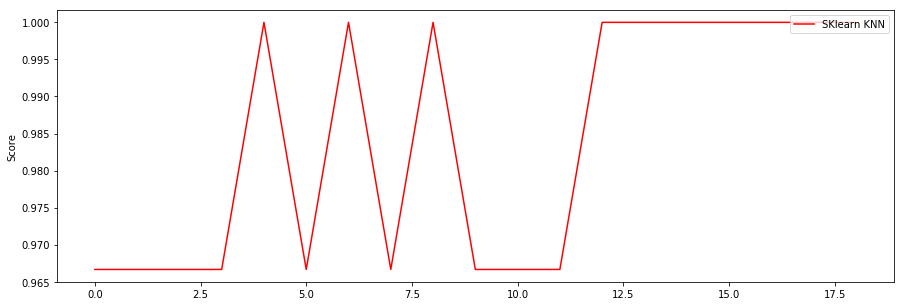

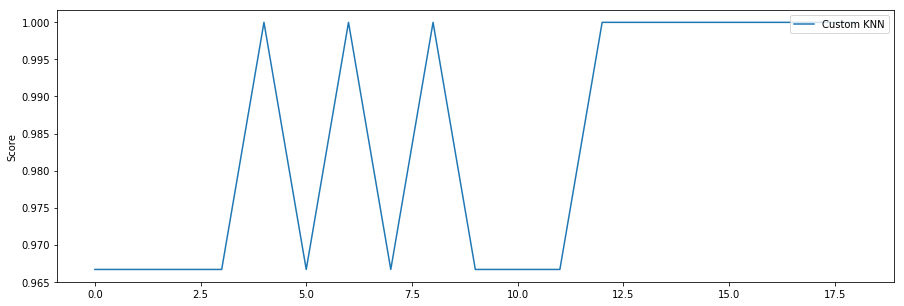

In [80]:
buf1 = []
buf2 = []
for k in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    my_clf = MyKNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    buf1.append(clf.score(X_test, y_test))
    buf2.append(my_clf.score(X_test, y_test))

fig = plt.figure(figsize=(15, 5))
ax1 = plt.plot(buf1, 'r', label='SKlearn KNN')
plt.ylabel("Score")
plt.legend(loc='upper right')

fig = plt.figure(figsize=(15, 5))
ax2 = plt.plot(buf2, label='Custom KNN')
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

In [81]:
optim_param = np.argmax(buf1) + 1
optim_param

5

**MNIST**

In [82]:
mnist = fetch_mldata('MNIST original')

In [83]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [84]:
clf = KNeighborsClassifier(n_neighbors=5)
my_clf = MyKNeighborsClassifier(n_neighbors=5)

In [85]:
%time clf.fit(X_train, y_train)

CPU times: user 35.3 s, sys: 232 ms, total: 35.5 s
Wall time: 35.5 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
%time my_clf.fit(X_train, y_train)

CPU times: user 217 ms, sys: 512 ms, total: 729 ms
Wall time: 1.45 s


In [87]:
%time clf.predict(X_test)

CPU times: user 1min 30s, sys: 35.9 ms, total: 1min 30s
Wall time: 1min 30s


array([ 9.,  5.,  0.,  8.,  2.,  9.,  1.,  3.,  4.,  9.,  6.,  5.,  7.,
        0.,  4.,  8.,  0.,  9.,  9.,  1.,  4.,  6.,  9.,  3.,  8.,  0.,
        7.,  2.,  0.,  2.,  5.,  9.,  1.,  9.,  8.,  5.,  0.,  4.,  3.,
        7.,  0.,  7.,  7.,  8.,  4.,  6.,  4.,  8.,  3.,  8.,  2.,  8.,
        9.,  0.,  6.,  0.,  0.,  4.,  7.,  2.,  9.,  9.,  6.,  7.,  5.,
        9.,  0.,  0.,  1.,  4.,  4.,  8.,  2.,  2.,  3.,  6.,  5.,  2.,
        1.,  8.,  4.,  9.,  5.,  5.,  1.,  6.,  2.,  1.,  6.,  6.,  3.,
        2.,  7.,  6.,  7.,  1.,  0.,  5.,  9.,  6.,  4.,  3.,  6.,  3.,
        3.,  6.,  9.,  3.,  6.,  2.,  7.,  7.,  7.,  8.,  6.,  7.,  7.,
        2.,  5.,  5.,  6.,  7.,  0.,  8.,  4.,  9.,  7.,  1.,  8.,  6.,
        6.,  3.,  7.,  1.,  8.,  1.,  1.,  5.,  6.,  7.,  5.,  1.,  9.,
        5.,  0.,  5.,  9.,  0.,  8.,  6.,  2.,  8.,  4.,  3.,  9.,  4.,
        1.,  8.,  8.,  2.,  5.,  7.,  9.,  9.,  1.,  6.,  2.,  0.,  0.,
        8.,  9.,  3.,  0.,  1.,  0.,  8.,  7.,  1.,  7.,  5.,  6

In [88]:
%time my_clf.predict(X_test)

CPU times: user 3.55 s, sys: 1.62 s, total: 5.17 s
Wall time: 20.5 s


array([9, 5, 0, 8, 2, 9, 1, 3, 4, 9, 6, 5, 7, 0, 4, 8, 0, 9, 9, 1, 4, 6, 9,
       3, 8, 0, 7, 2, 0, 2, 5, 9, 1, 9, 8, 5, 0, 4, 3, 7, 0, 7, 7, 8, 4, 6,
       4, 8, 3, 8, 2, 8, 9, 0, 6, 0, 0, 4, 7, 2, 9, 9, 6, 7, 5, 9, 0, 0, 1,
       4, 4, 8, 2, 2, 3, 6, 5, 2, 1, 8, 4, 9, 5, 5, 1, 6, 2, 1, 6, 6, 3, 2,
       7, 6, 7, 1, 0, 5, 9, 6, 4, 3, 6, 3, 3, 6, 9, 3, 6, 2, 7, 7, 7, 8, 6,
       7, 7, 2, 5, 5, 6, 7, 0, 8, 4, 9, 7, 1, 8, 6, 6, 3, 7, 1, 8, 1, 1, 5,
       6, 7, 5, 1, 9, 5, 0, 5, 9, 0, 8, 6, 2, 8, 4, 3, 9, 4, 1, 8, 8, 2, 5,
       7, 9, 9, 1, 6, 2, 0, 0, 8, 9, 3, 0, 1, 0, 8, 7, 1, 7, 5, 6, 1, 3, 4,
       1, 8, 5, 4, 2, 6, 3, 0, 7, 9, 6, 6, 4, 9, 3, 9, 8, 7, 1, 3, 9, 5, 1,
       1, 9, 9, 1, 4, 6, 0, 2, 0, 1, 0, 7, 1, 0, 9, 7, 9, 5, 3, 2, 9, 1, 6,
       0, 3, 0, 2, 8, 5, 3, 3, 3, 2, 4, 5, 4, 5, 7, 6, 3, 0, 6, 6, 4, 6, 3,
       5, 1, 2, 6, 3, 3, 7, 5, 4, 7, 7, 1, 2, 5, 2, 3, 5, 4, 8, 2, 1, 8, 2,
       6, 3, 5, 4, 0, 2, 6, 4, 2, 2, 4, 0, 7, 1, 1, 9, 7, 8, 0, 8, 1, 3, 2,
       9, 5,

In [89]:
%time clf.predict_proba(X_test)

CPU times: user 1min 28s, sys: 84.2 ms, total: 1min 28s
Wall time: 1min 29s


array([[ 0. ,  0. ,  0. , ...,  0.2,  0. ,  0.8],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.2,  0. ]])

In [90]:
%time my_clf.predict_proba(X_test)

CPU times: user 3.34 s, sys: 892 ms, total: 4.23 s
Wall time: 3.74 s


array([[ 0. ,  0. ,  0. , ...,  0.2,  0. ,  0.8],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.2,  0. ]])

In [91]:
%time clf.score(X_test, y_test)

CPU times: user 1min 29s, sys: 32 ms, total: 1min 29s
Wall time: 1min 29s


0.96714285714285719

In [92]:
%time my_clf.score(X_test, y_test)

CPU times: user 3.46 s, sys: 804 ms, total: 4.27 s
Wall time: 3.03 s


0.96714285714285719

Задание 4

In [93]:
clf = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [95]:
%time clf.fit(X_train, y_train)

CPU times: user 38.2 s, sys: 188 ms, total: 38.4 s
Wall time: 38.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [96]:
%time my_clf.fit(X_train, y_train)

CPU times: user 32 s, sys: 324 ms, total: 32.3 s
Wall time: 32.2 s


In [97]:
%time clf.predict(X_test)

CPU times: user 1min 28s, sys: 43.8 ms, total: 1min 28s
Wall time: 1min 28s


array([ 2.,  5.,  7.,  6.,  6.,  8.,  5.,  3.,  4.,  5.,  4.,  9.,  3.,
        2.,  4.,  2.,  8.,  0.,  1.,  3.,  0.,  1.,  7.,  9.,  9.,  5.,
        4.,  4.,  6.,  1.,  3.,  9.,  5.,  7.,  5.,  5.,  9.,  1.,  9.,
        1.,  9.,  0.,  3.,  5.,  9.,  0.,  1.,  9.,  1.,  9.,  7.,  2.,
        9.,  9.,  2.,  8.,  1.,  8.,  2.,  4.,  4.,  4.,  2.,  3.,  1.,
        5.,  0.,  3.,  3.,  8.,  1.,  0.,  0.,  8.,  4.,  5.,  6.,  0.,
        5.,  3.,  9.,  9.,  7.,  6.,  1.,  1.,  1.,  8.,  1.,  3.,  0.,
        2.,  8.,  5.,  1.,  2.,  3.,  5.,  4.,  0.,  8.,  3.,  1.,  5.,
        7.,  0.,  2.,  5.,  3.,  5.,  6.,  7.,  2.,  1.,  9.,  1.,  3.,
        6.,  2.,  5.,  3.,  5.,  8.,  2.,  6.,  2.,  1.,  6.,  0.,  5.,
        3.,  0.,  1.,  1.,  8.,  1.,  3.,  3.,  6.,  2.,  7.,  9.,  9.,
        0.,  7.,  4.,  7.,  4.,  3.,  6.,  9.,  8.,  1.,  7.,  1.,  8.,
        1.,  3.,  2.,  0.,  5.,  7.,  7.,  6.,  7.,  4.,  9.,  1.,  7.,
        0.,  1.,  5.,  1.,  7.,  2.,  1.,  8.,  9.,  4.,  0.,  2

In [98]:
%time my_clf.predict(X_test)

CPU times: user 1min 14s, sys: 8.07 ms, total: 1min 14s
Wall time: 1min 14s


array([2, 5, 7, 6, 6, 8, 5, 3, 4, 5, 4, 9, 3, 2, 4, 2, 8, 0, 1, 3, 0, 1, 7,
       9, 9, 5, 4, 4, 6, 1, 3, 9, 5, 7, 5, 5, 9, 1, 9, 1, 9, 0, 3, 5, 9, 0,
       1, 9, 1, 9, 7, 2, 9, 9, 2, 8, 1, 8, 2, 4, 4, 4, 2, 3, 1, 5, 0, 3, 3,
       8, 1, 0, 0, 8, 4, 5, 6, 0, 5, 3, 9, 9, 7, 6, 1, 1, 1, 8, 1, 3, 0, 2,
       8, 5, 1, 2, 3, 5, 4, 0, 8, 3, 1, 5, 7, 0, 2, 5, 3, 5, 6, 7, 2, 1, 9,
       1, 3, 6, 2, 5, 3, 5, 8, 2, 6, 2, 1, 6, 0, 5, 3, 0, 1, 1, 8, 1, 3, 3,
       6, 2, 7, 9, 9, 0, 7, 4, 7, 4, 3, 6, 9, 8, 1, 7, 1, 8, 1, 3, 2, 0, 5,
       7, 7, 6, 7, 4, 9, 1, 7, 0, 1, 5, 1, 7, 2, 1, 8, 9, 4, 0, 2, 1, 1, 7,
       3, 3, 4, 0, 6, 7, 1, 3, 1, 0, 6, 1, 4, 9, 7, 8, 3, 9, 2, 6, 3, 0, 4,
       3, 8, 7, 5, 4, 4, 1, 0, 9, 2, 1, 8, 0, 9, 2, 1, 5, 9, 2, 0, 8, 1, 7,
       9, 8, 4, 3, 8, 4, 9, 5, 1, 1, 6, 1, 2, 6, 9, 7, 1, 4, 8, 6, 6, 3, 5,
       7, 9, 3, 3, 2, 0, 6, 6, 8, 7, 5, 6, 8, 7, 7, 0, 0, 1, 4, 1, 4, 1, 3,
       2, 4, 5, 0, 4, 8, 2, 6, 2, 2, 6, 3, 6, 6, 0, 2, 1, 4, 9, 4, 7, 2, 5,
       4, 9,

In [99]:
%time clf.predict_proba(X_test)

CPU times: user 1min 28s, sys: 4.08 ms, total: 1min 28s
Wall time: 1min 28s


array([[ 0. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.8, ...,  0.2,  0. ,  0. ]])

In [100]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 14s, sys: 16.1 ms, total: 1min 14s
Wall time: 1min 14s


array([[ 0. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.8, ...,  0.2,  0. ,  0. ]])

In [101]:
%time clf.score(X_test, y_test)

CPU times: user 1min 28s, sys: 4.08 ms, total: 1min 28s
Wall time: 1min 28s


0.97142857142857142

In [102]:
%time my_clf.score(X_test, y_test)

CPU times: user 1min 15s, sys: 36 ms, total: 1min 15s
Wall time: 1min 15s


0.97142857142857142

Задание 5

In [ ]:
# seaborn - библиотека для визуализации, основанная на matplotlib
# matplotlib - основная библиотека для визуализации
# train_test_split - метод для разделения выборки на обучающую и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - объект конвейера для последовательных преобразований с некоторой моделью в конце
# StandardScaler (from sklearn.preprocessing import StandardScaler) - функция для центрирования и нормирования выборки
# ClassifierMixin - базовый класс для всех классификаторов, реализует метод score(), возвращающий метрику accuracy
# NeighborsBase - метод _fit() вызывается после вызова метода fit() класса SupervisedIntegerMixin и реализует логику по сохранению выборки X 
# и устнановки параметров метрики.Метод _check_algorithm_metric используется для проверки параметров метрики
# KNeighborsMixin - реализует функции kneighbors и kneighbors_graph для нахождения k ближайших соседей и построения графа соседей соответственно
# SupervisedIntegerMixin - используется для проверки типа y при вызове fit()